In [ ]:
## Si ya se realizó la descarga de los datos esta celda no es necesaria



#import kagglehub
#import os

# Descargar el dataset
#path = kagglehub.dataset_download("josetroyatoscano/covid19-colombia-complete-dataset-dec-2023")

#print("Dataset downloaded to:", path)

In [2]:
# Bloque 1: Importación de librerías y carga de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para visualizaciones
plt.style.use('default')
sns.set_palette("husl")

# Hubicación del dataset
path = "/home/david/.cache/kagglehub/datasets/josetroyatoscano/covid19-colombia-complete-dataset-dec-2023/versions/1"
path_dataset = path + "/COVID19 COLOMBIA - Complete Dataset DEC-2023.csv"

# Cargar el dataset
df = pd.read_csv(path_dataset)

/tmp/ipykernel_2146515/2629573636.py:16: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path_dataset)


In [3]:
df.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,2020-12-24 00:00:00,1556979,2020-12-22 00:00:00,76,VALLE,76001,CALI,67,1,F,...,NaN,NaN,Recuperado,2020-12-21 00:00:00,NaN,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6.0,NaN
1,2020-12-24 00:00:00,1556980,2020-12-19 00:00:00,76,VALLE,76001,CALI,66,1,F,...,NaN,NaN,Recuperado,2020-12-07 00:00:00,NaN,2020-12-23 00:00:00,2020-12-25 00:00:00,Tiempo,6.0,NaN
2,2020-12-24 00:00:00,1556981,2020-12-19 00:00:00,76,VALLE,76001,CALI,68,1,F,...,NaN,NaN,Recuperado,2020-12-18 00:00:00,NaN,2020-12-22 00:00:00,2021-01-01 00:00:00,Tiempo,6.0,NaN
3,2020-12-24 00:00:00,1556982,2020-12-22 00:00:00,76,VALLE,76001,CALI,74,1,F,...,NaN,NaN,Fallecido,2020-12-17 00:00:00,2020-12-30 00:00:00,2020-12-23 00:00:00,NaN,NaN,6.0,NaN
4,2020-12-24 00:00:00,1556983,2020-12-22 00:00:00,76,VALLE,76001,CALI,65,1,F,...,NaN,NaN,Recuperado,2020-12-21 00:00:00,NaN,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6.0,NaN


In [4]:
df.shape

(6387145, 23)

In [5]:
# =============================
# 2. Selección de variables
# =============================
# Separamos categóricas y numéricas
cat_cols = df.select_dtypes(include=["object"]).columns
num_cols = df.select_dtypes(include=[np.number]).columns

print("Categóricas:", cat_cols[:10])
print("Numéricas:", num_cols[:10])

Categóricas: Index(['fecha reporte web', 'Fecha de notificación', 'Nombre departamento',
       'Nombre municipio', 'Sexo', 'Tipo de contagio', 'Ubicación del caso',
       'Estado', 'Nombre del país', 'Recuperado'],
      dtype='object')
Numéricas: Index(['ID de caso', 'Código DIVIPOLA departamento',
       'Código DIVIPOLA municipio', 'Edad', 'Unidad de medida de edad',
       'Código ISO del país', 'Pertenencia étnica'],
      dtype='object')


In [3]:
## Debido a la cantidad de datos, tomamos solo una muestra
df_sample = df.sample(100000, random_state=42)

In [4]:
## Con estos datos de muestra utilizamos LabelEncoder para codificar los datos

from sklearn.preprocessing import LabelEncoder

df_sample["Nombre municipio"] = LabelEncoder().fit_transform(df_sample["Nombre municipio"])
df_sample["Nombre departamento"] = LabelEncoder().fit_transform(df_sample["Nombre departamento"])


In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# =============================
# 3. Preprocesamiento
# =============================
# - Imputar valores faltantes
# - Codificar categóricas con OneHotEncoder
# - Escalar numéricas con StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), num_cols),
        
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols)
    ]
)

## Reducción de dimensionalidad con PCA

In [5]:
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler

# Seleccionar solo algunas columnas relevantes
features = ["Edad", "Sexo", "Estado", "Recuperado", "Nombre departamento"]
df_sample = df[features].sample(100000, random_state=42).copy()

# Codificación simple
df_sample["Sexo"] = LabelEncoder().fit_transform(df_sample["Sexo"])
df_sample["Estado"] = LabelEncoder().fit_transform(df_sample["Estado"])
df_sample["Recuperado"] = LabelEncoder().fit_transform(df_sample["Recuperado"])
df_sample["Nombre departamento"] = LabelEncoder().fit_transform(df_sample["Nombre departamento"])

# Escalado
X_scaled = StandardScaler().fit_transform(df_sample)

# PCA incremental
ipca = IncrementalPCA(n_components=2, batch_size=5000)
X_pca = ipca.fit_transform(X_scaled)



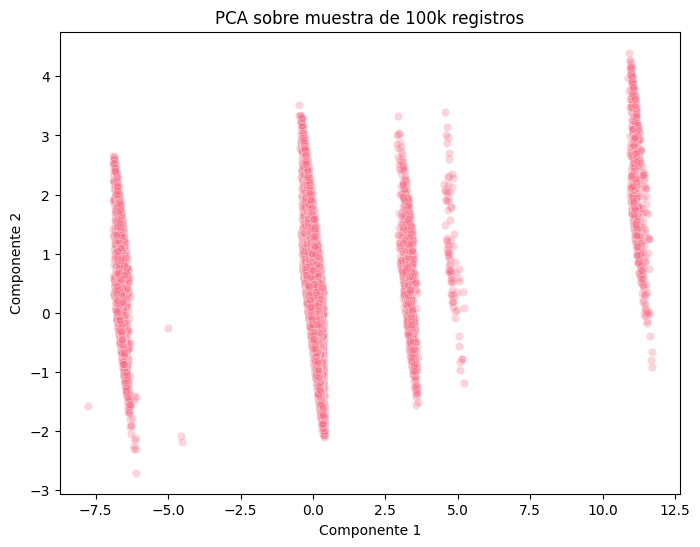

In [6]:
# Visualización
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], alpha=0.3)
plt.title("PCA sobre muestra de 100k registros")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

El gráfico muestra varias “bandas verticales” bien definidas. Esto significa que hay categorías muy fuertes en los datos originales que el PCA está captando.